# 12/09/2024

## Filtro Butterworth

### Inserte el orden que desee y la frecuencia de la señal senociodal (2000 requiere el ejercicio)

Digite el orden del filtro de 2 a 6:  2
Digite la frecuencia de la señal:  15


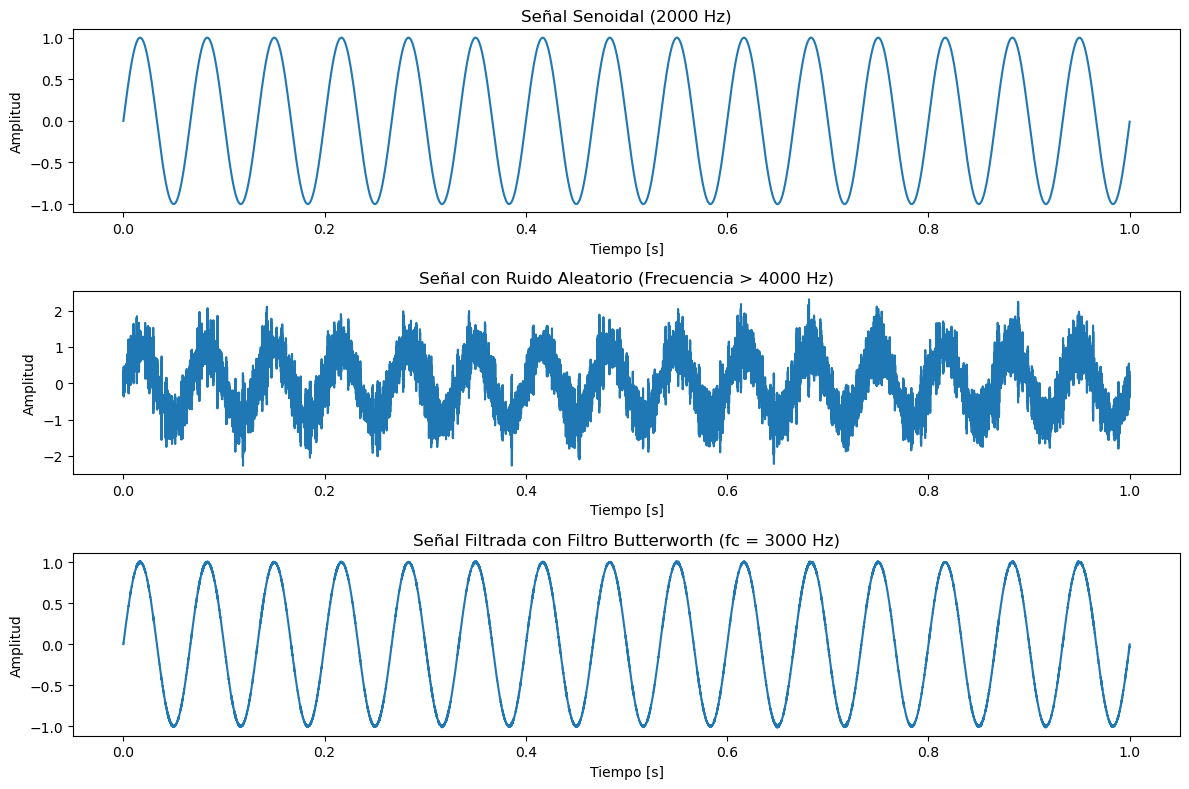

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parámetros del filtro
fc = 3000  # Frecuencia de corte
fs = 10000  # Frecuencia de muestreo

while True:
    try:
        # Definir el número N con una entrada válida entre 2 y 6
        order = float(input("Digite el orden del filtro de 2 a 6: "))
        # Verificar si el número está en el rango correcto
        if 2 <= order <= 6:
            break  # Salir del bucle si el número es válido
        else:
            print("El número no está en el rango permitido. Inténtalo de nuevo.")
    except ValueError:
        # Si la entrada no es un número, mostrar un mensaje de error
        print("Entrada no válida. Por favor, ingrese un número.")

# Señal senoidal
while True:
    try:
        # Leer un número flotante del usuario
        f_seno = float(input("Digite la frecuencia de la señal: "))
        break  # Salir del bucle si la entrada es válida
    except ValueError:
        # Mostrar un mensaje de error si la entrada no es un número flotante
        print("Entrada no válida. Por favor, ingrese un número.")

t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo
signal = np.sin(2 * np.pi * f_seno * t)  # Señal senoidal

# Ruido aleatorio con frecuencia mayor a 4000 Hz
def add_random_noise(signal, fs):
    # Generar ruido blanco y filtrar para tener componentes de frecuencia mayor a 4000 Hz
    noise = np.random.normal(0, 1, len(t))
    b, a = butter(4, 4000 / (0.5 * fs), btype='high', analog=False)
    high_freq_noise = filtfilt(b, a, noise)
    noisy_signal = signal + high_freq_noise
    return noisy_signal

# Crear el filtro Butterworth
def butterworth_filter(data, cutoff, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Añadir ruido aleatorio
noisy_signal = add_random_noise(signal, fs)

# Filtrar la señal
filtered_signal = butterworth_filter(noisy_signal, fc, fs, order)

# Graficar señales
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Señal Senoidal (2000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal con ruido
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Señal con Ruido Aleatorio (Frecuencia > 4000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Señal Filtrada con Filtro Butterworth (fc = 3000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


## Filtro Chebyshev

### Inserte el orden que desee y la frecuencia de la señal senociodal (2000 requiere el ejercicio)

Digite el orden del filtro de 2 a 6:  2
Digite la frecuencia de la señal:  25


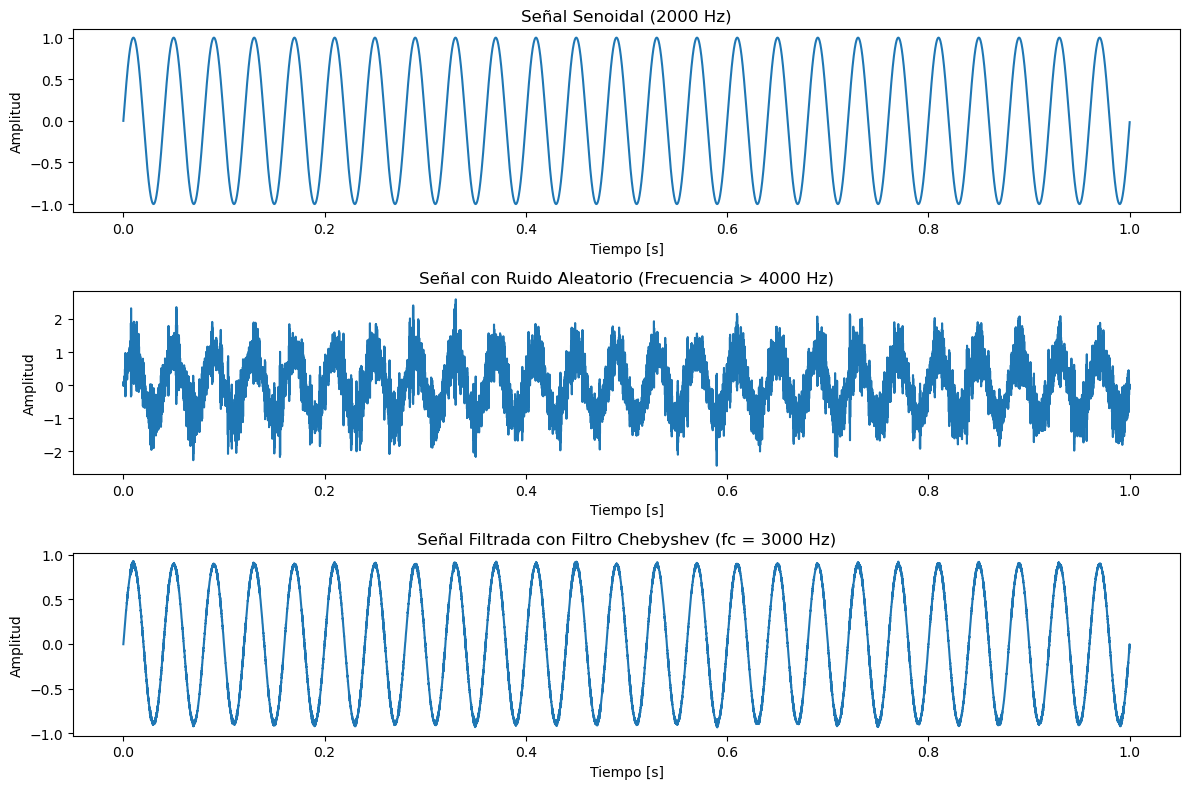

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, filtfilt

# Parámetros del filtro
fc = 3000  # Frecuencia de corte
fs = 10000  # Frecuencia de muestreo

while True:
    try:
        # Definir el número N con una entrada válida entre 2 y 6
        order = float(input("Digite el orden del filtro de 2 a 6: "))
        # Verificar si el número está en el rango correcto
        if 2 <= order <= 6:
            break  # Salir del bucle si el número es válido
        else:
            print("El número no está en el rango permitido. Inténtalo de nuevo.")
    except ValueError:
        # Si la entrada no es un número, mostrar un mensaje de error
        print("Entrada no válida. Por favor, ingrese un número.")

# Señal senoidal
while True:
    try:
        # Leer un número flotante del usuario
        f_seno = float(input("Digite la frecuencia de la señal: "))
        break  # Salir del bucle si la entrada es válida
    except ValueError:
        # Mostrar un mensaje de error si la entrada no es un número flotante
        print("Entrada no válida. Por favor, ingrese un número.")
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo
signal = np.sin(2 * np.pi * f_seno * t)  # Señal senoidal

# Ruido aleatorio con frecuencia mayor a 4000 Hz
def add_random_noise(signal, fs):
    # Generar ruido blanco y filtrar para tener componentes de frecuencia mayor a 4000 Hz
    noise = np.random.normal(0, 1, len(t))
    b, a = butter(4, 4000 / (0.5 * fs), btype='high', analog=False)
    high_freq_noise = filtfilt(b, a, noise)
    noisy_signal = signal + high_freq_noise
    return noisy_signal

# Crear el filtro Chebyshev
def chebyshev_filter(data, cutoff, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = cheby1(order, 0.5, normal_cutoff, btype='low', analog=False)  # 0.5 es la atenuación en dB
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Añadir ruido aleatorio
noisy_signal = add_random_noise(signal, fs)

# Filtrar la señal
filtered_signal = chebyshev_filter(noisy_signal, fc, fs, order)

# Graficar señales
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Señal Senoidal (2000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal con ruido
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Señal con Ruido Aleatorio (Frecuencia > 4000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Señal Filtrada con Filtro Chebyshev (fc = 3000 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()
